소프트웨어 202284011 김연재
3장 학습 내용

In [149]:
#계단 함수 구현하기

def step_function(x):
    if x> 0:
        return 1
    else:
        return 0

In [150]:
print(step_function(2))

1


In [151]:
print(step_function(0.5))

1


In [152]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int32)

In [153]:
x = np.array([2, 0.5, -0.5])

In [154]:
print(step_function(x))

[1 1 0]


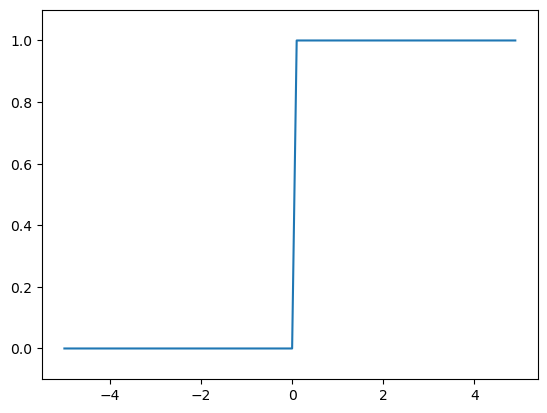

In [155]:
#계단 함수의 그래프
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

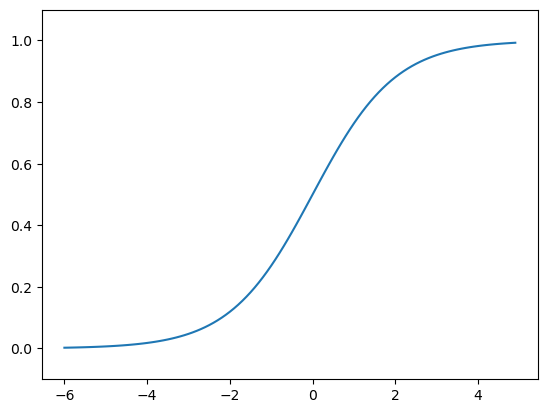

In [156]:
#시그모이드 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-6.0, 5.0, 0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

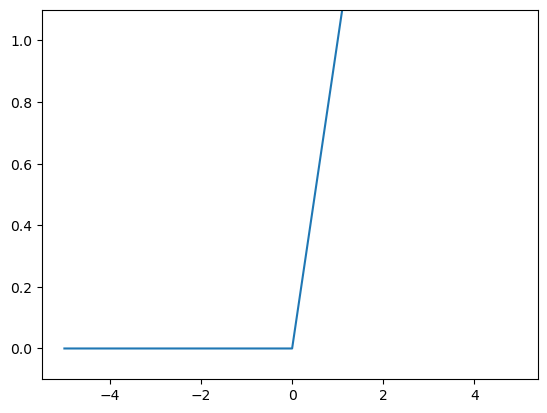

In [157]:
#ReLU 함수 구현
def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0, 5.0, 0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [158]:
#다차원 배열
A = np.array([1,2,3,4])
print(A)
np.ndim(A)

[1 2 3 4]


1

In [159]:
A.shape
A.shape[0]

4

In [164]:
#3층 신경망 구현하기

#입력층에서 1층으로 신호 전당
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [165]:
# 1층의 활성화 함수에서의 처리
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [166]:
#1층에서 2층으로 신호 전달

def sigmold(x):
    return 1/(1+np.exp(-x))

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [173]:
#2층에서 출력층으로 신호 전달

def identity_function(x):
    return X

W3 = np.array([[0.1, 0.3], [0.2, 0.5]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[1.  0.5]


In [178]:
#3층 신경망 구현 정리

def identity_function(x):
    return X

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[1.  0.5]
